# The code here is for the analysis of membership type 
- Comparing subscriber and customer in total trip count and trip count per city
- (Not This Part) Comparing subscriber and customer bike share usage on different weather at different time of the year

### ------- Reading data and creating columns --------

In [131]:
from pandas import DataFrame, read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format   # all results in 2 decimal points
#from ggplot import *

In [127]:
# formatting lambdas & functions
#fnone = lambda x : '{0:g}'.format(float(x))
#fshort = lambda x : '{:,.2f}'.format(x)

def convert_float(val):
    try:
        return float(val)
    except ValueError:
        return 0

# dictionary reference
seasons_dict = {
    1: 'Winter',2: 'Spring',3: 'Spring',4: 'Spring',
    5: 'Summer',6: 'Summer',7: 'Summer',8: 'Autumn',
    9: 'Autumn',10: 'Autumn',11: 'Winter',12: 'Winter'}

city_dict = {
    94107: 'San Francisco',
    94063: 'Redwood City',
    94301: 'Palo Alto', 
    94041: 'Mountain View', 
    95113: 'San Jose'}

# header reference
station_headers = ['station_id','station_name','lat','long',
                   'dock_count','city','install_date']

status_headers = ['station_id','bikes_free','docks_free','time']

trip_headers = ['trip_id','trip_time',
                'start_dt','start_station','start_terminal',
                'end_dt','end_station','end_terminal',
                'bike_num','user_type','ZIP']

weather_headers = ['date',
                   'max_temp','mean_temp','min_temp',
                   'max_dp','mean_dp','min_dp',
                   'max_hum','mean_hum','min_hum',
                   'max_sea','mean_sea','min_sea',
                   'max_vis','mean_vis','min_vis',
                   'max_wind','mean_wind','max_gust',
                   'rain_inches','cloud_cover','events',
                   'wind_dir_degrees','ZIP']

In [56]:
# read trip data for 2014 
raw_data_201402 = pd.read_csv('201402_trip_data_new.csv', parse_dates=True)
raw_data_201402.columns = trip_headers
raw_data_201408 = pd.read_csv('201408_trip_data_new.csv', parse_dates=True)
raw_data_201408.columns = trip_headers

In [57]:
# joining 201402 and 201408 together
raw_data_2014 = pd.concat([raw_data_201402, raw_data_201408])
# convert duration column "trip_time" to unit of minutes
raw_data_2014['trip_time'] = raw_data_2014['trip_time'] / 60   # trip time unit in minute

In [229]:
# read trip data for 2015
raw_data_2015 = pd.read_csv('201508_trip_data_new.csv', parse_dates=True)
raw_data_2015.columns = trip_headers
raw_data_2015['trip_time'] = raw_data_2015['trip_time'] / 60 # trip time unit in minute 

## Part 1 - Membership count in total and per city

### ------------- Year 2014 ------------- 

In [59]:
raw_data_2014.head()

,trip_id,trip_time,start_dt,start_station,start_terminal,end_dt,end_station,end_terminal,bike_num,user_type,ZIP
0,7442,25.13,9/1/13 0:11,Mechanics Plaza (Market at Battery),75,9/1/13 0:36,Beale at Market,56,506,Customer,55405
1,7443,25.22,9/1/13 0:12,Mechanics Plaza (Market at Battery),75,9/1/13 0:37,Beale at Market,56,334,Customer,55405
2,7444,22.42,9/1/13 0:19,South Van Ness at Market,66,9/1/13 0:41,Harry Bridges Plaza (Ferry Building),50,464,Customer,NaN
3,7445,15.52,9/1/13 0:21,Mechanics Plaza (Market at Battery),75,9/1/13 0:36,Mechanics Plaza (Market at Battery),75,422,Customer,NaN
4,7446,2.65,9/1/13 0:23,Broadway at Main,25,9/1/13 0:25,Franklin at Maple,21,239,Subscriber,94063


In [61]:
# create new dataframes with columns related to only trip time (duration) and user type (subscription)
duration_data_2014 = pd.DataFrame(raw_data_2014, columns=['user_type', 'trip_time'])
duration_data_2014.columns = ['membership', 'trip_duration']  
duration_data_2014.head()

,membership,trip_duration
0,Customer,25.13
1,Customer,25.22
2,Customer,22.42
3,Customer,15.52
4,Subscriber,2.65


## Total Count and membership in total

In [177]:
# duration description in total
duration_data_2014.describe()

,trip_duration
count,"313,705.00"
mean,19.47
std,105.33
min,1.00
25%,5.77
50%,8.70
75%,12.90
max,"12,037.27"


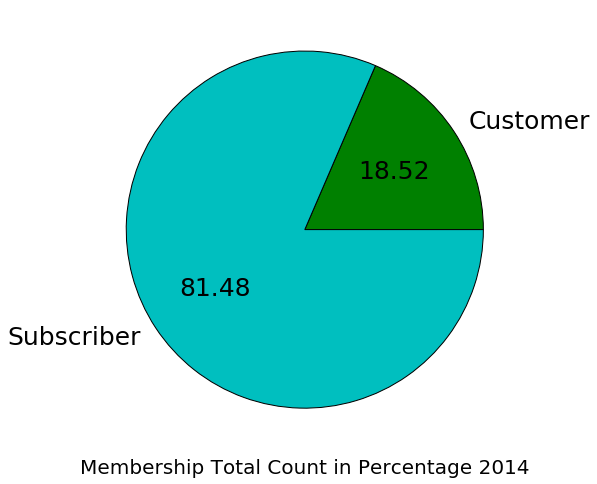

In [283]:
# membership count (same as trip count) counts in total
membership_2014 = duration_data_2014.groupby('membership')
count_2014 = membership_2014.count()['trip_duration']
count_2014.plot.pie(autopct='%.2f', fontsize=25, figsize=(8,8),colors=['g', 'c'])
plt.ylabel('')
plt.xlabel('Membership Total Count in Percentage 2014', fontsize=20)

In [64]:
# statistics table for total customer and subscribers in 2014
membership_2014.describe()

trip_duration
membership                     
Customer   count      58,105.00
           mean           62.56
           std           221.02
           min             1.02
           25%            10.87
           50%            18.43
           75%            37.83
           max        12,037.27
Subscriber count     255,600.00
           mean            9.67
           std            44.64
           min             1.00
           25%             5.33
           50%             7.85
           75%            11.02
           max        11,941.33

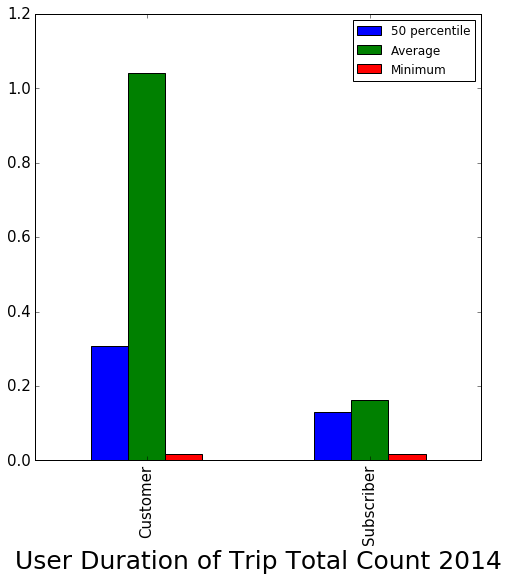

In [86]:
# make a new table with min, max, mean for both membership
mean_2014 = membership_2014.mean()['trip_duration'] / 60  # unit in hour
min_2014 = membership_2014.min()['trip_duration'] / 60 # unit in hour  
mid_2014 = membership_2014.quantile(0.5)['trip_duration'] / 60  # unit in hour
#max_2014 = membership_2014.max()['trip_duration'] / 60 # unit in hour ---> too big

member_time_2014 = pd.DataFrame({'Average': mean_2014, '50 percentile': mid_2014, 'Minimum': min_2014})
member_time_2014.plot.bar(figsize=(8,8),fontsize=15)
plt.xlabel('User Duration of Trip Total Count 2014', fontsize=25)

## Trip Count and membershio info per city (SF, RC, PA, SJ, MV)

In [156]:
# STATION_DATA
# read station data, grou
raw_data_1 = pd.read_csv('201402_station_data.csv')
raw_data_1.columns = station_headers
raw_data_2 = pd.read_csv('201408_station_data.csv')
raw_data_2.columns = station_headers
raw_data_3 = pd.read_csv('201508_station_data.csv') # current dataset
raw_data_3.columns = station_headers

# merged station datasets
station_data = pd.concat([raw_data_1, raw_data_2, raw_data_3])
station_data.head()

,station_id,station_name,lat,long,dock_count,city,install_date
0,2,San Jose Diridon Caltrain Station,37.33,-121.90,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.33,-121.89,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.33,-121.89,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.33,-121.89,19,San Jose,8/5/2013
4,6,San Pedro Square,37.34,-121.89,15,San Jose,8/7/2013


In [174]:
# sort station ID by city
san_jose_station_id = list(set(station_data[station_data['city']=='San Jose']['station_id']))
san_francisco_station_id = list(set(station_data[station_data['city']=='San Francisco']['station_id']))
redwood_city_station_id = list(set(station_data[station_data['city']=='Redwood City']['station_id']))
palo_alto_station_id = list(set(station_data[station_data['city']=='Palo Alto']['station_id']))
mountain_view_station_id = list(set(station_data[station_data['city']=='Mountain View']['station_id']))

In [190]:
# filter raw trip data 2014 according to station ID
sf_trip_data_2014 = raw_data_2014[raw_data_2014['start_terminal'].isin(palo_alto_station_id)]
sj_trip_data_2014 = raw_data_2014[raw_data_2014['start_terminal'].isin(san_jose_station_id)]
rc_trip_data_2014 = raw_data_2014[raw_data_2014['start_terminal'].isin(redwood_city_station_id)]
pa_trip_data_2014 = raw_data_2014[raw_data_2014['start_terminal'].isin(palo_alto_station_id)]
mv_trip_data_2014 = raw_data_2014[raw_data_2014['start_terminal'].isin(mountain_view_station_id)]

### San Francisco Trip Count and Membership info

In [192]:
sf_trip_data_2014 = pd.DataFrame(sf_trip_data_2014, columns=['user_type', 'trip_time'])
sf_trip_data_2014.columns = ['membership', 'trip_duration']  
sf_trip_data_2014.head()

,membership,trip_duration
228,Customer,21.75
253,Customer,33.78
287,Customer,75.80
376,Customer,106.07
377,Customer,99.10


In [196]:
# SF trip data statistics for both user type
sf_trip_data_2014.describe()

,trip_duration
count,"3,636.00"
mean,72.66
std,354.07
min,1.05
25%,5.56
50%,15.63
75%,44.95
max,"12,037.27"


In [198]:
# SF trip data for each user type
sf_trip_data_membership_2014.describe()

trip_duration
membership                     
Customer   count       1,688.00
           mean          140.22
           std           503.83
           min             1.05
           25%            20.13
           50%            49.53
           75%            99.54
           max        12,037.27
Subscriber count       1,948.00
           mean           14.11
           std            81.94
           min             1.10
           25%             3.66
           50%             9.09
           75%            14.57
           max         3,235.87

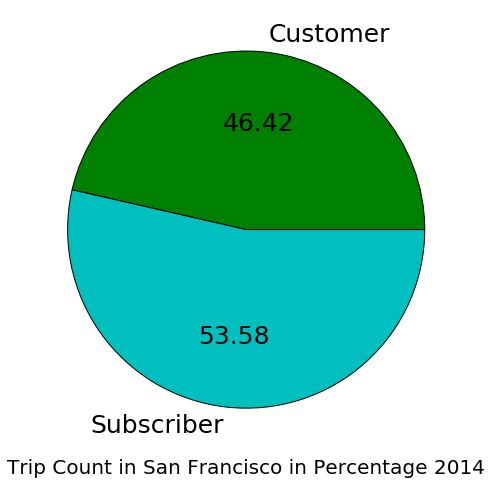

In [197]:
# membership count (same as trip count) counts in San Francisco
sf_trip_data_membership_2014 = sf_trip_data_2014.groupby('membership')
sf_count_2014 = sf_trip_data_membership_2014.count()['trip_duration']
sf_count_2014.plot.pie(autopct='%.2f', fontsize=25, figsize=(8,8),colors=['g', 'c'])
plt.ylabel('')
plt.xlabel('Trip Count in San Francisco in Percentage 2014', fontsize=20)

### San Jose Trip Count and Membership info

In [199]:
sj_trip_data_2014 = pd.DataFrame(sj_trip_data_2014, columns=['user_type', 'trip_time'])
sj_trip_data_2014.columns = ['membership', 'trip_duration']  
sj_trip_data_2014.head()

,membership,trip_duration
18,Customer,662.52
92,Customer,43.65
141,Customer,21.48
148,Customer,18.43
167,Customer,8.18


In [200]:
# SJ trip data statistics for both user type
sj_trip_data_2014.describe()

,trip_duration
count,"19,764.00"
mean,22.66
std,163.44
min,1.02
25%,4.87
50%,7.57
75%,11.52
max,"11,922.32"


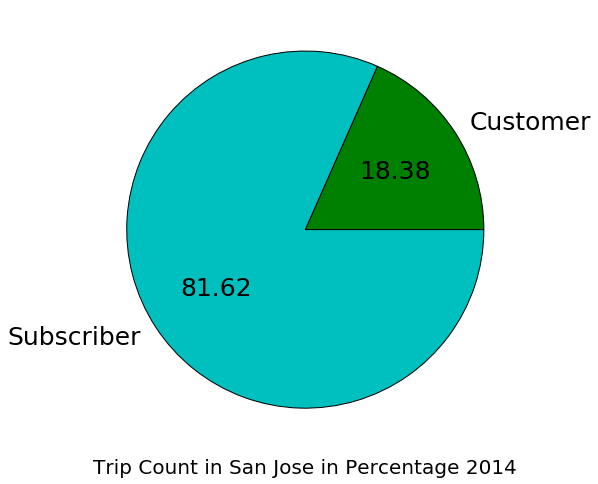

In [207]:
# membership count (same as trip count) counts in San Jose
sj_trip_data_membership_2014 = sj_trip_data_2014.groupby('membership')
sj_count_2014 = sj_trip_data_membership_2014.count()['trip_duration']
sj_count_2014.plot.pie(autopct='%.2f', fontsize=25, figsize=(8,8),colors=['g', 'c'])
plt.ylabel('')
plt.xlabel('Trip Count in San Jose in Percentage 2014', fontsize=20)

In [204]:
# SJ trip data for each user type
sj_trip_data_membership_2014.describe()

trip_duration
membership                     
Customer   count       3,632.00
           mean           80.79
           std           327.31
           min             1.02
           25%            10.05
           50%            17.86
           75%            44.53
           max        11,922.32
Subscriber count      16,132.00
           mean            9.57
           std            87.63
           min             1.05
           25%             4.55
           50%             6.80
           75%             9.58
           max        10,322.03

### Palo Alto Trip Count and Membership info

In [206]:
pa_trip_data_2014 = pd.DataFrame(pa_trip_data_2014, columns=['user_type', 'trip_time'])
pa_trip_data_2014.columns = ['membership', 'trip_duration']  
pa_trip_data_2014.head()

,membership,trip_duration
228,Customer,21.75
253,Customer,33.78
287,Customer,75.80
376,Customer,106.07
377,Customer,99.10


In [210]:
# PA trip data statistics for both user type
pa_trip_data_2014.describe()

,trip_duration
count,"3,636.00"
mean,72.66
std,354.07
min,1.05
25%,5.56
50%,15.63
75%,44.95
max,"12,037.27"


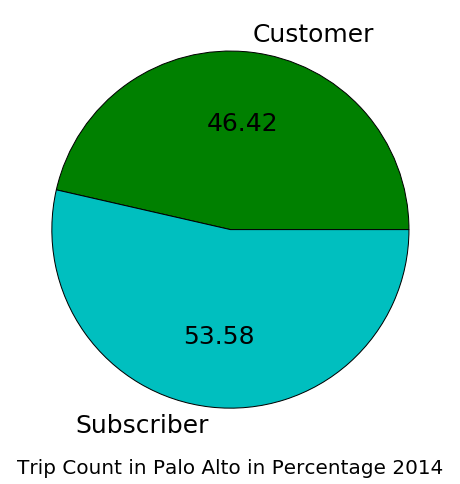

In [211]:
# membership count (same as trip count) counts in Palo Alto
pa_trip_data_membership_2014 = pa_trip_data_2014.groupby('membership')
pa_count_2014 = pa_trip_data_membership_2014.count()['trip_duration']
pa_count_2014.plot.pie(autopct='%.2f', fontsize=25, figsize=(8,8),colors=['g', 'c'])
plt.ylabel('')
plt.xlabel('Trip Count in Palo Alto in Percentage 2014', fontsize=20)

In [212]:
# PA trip data for each user type
pa_trip_data_membership_2014.describe()

trip_duration
membership                     
Customer   count       1,688.00
           mean          140.22
           std           503.83
           min             1.05
           25%            20.13
           50%            49.53
           75%            99.54
           max        12,037.27
Subscriber count       1,948.00
           mean           14.11
           std            81.94
           min             1.10
           25%             3.66
           50%             9.09
           75%            14.57
           max         3,235.87

### Redwood CIty Trip Count and Membership info

In [214]:
rc_trip_data_2014 = pd.DataFrame(rc_trip_data_2014, columns=['user_type', 'trip_time'])
rc_trip_data_2014.columns = ['membership', 'trip_duration']  
rc_trip_data_2014.head()

,membership,trip_duration
4,Subscriber,2.65
101,Subscriber,5.32
259,Customer,435.47
261,Customer,435.00
380,Customer,27.62


In [215]:
# RC trip data statistics for both user type
rc_trip_data_2014.describe()

,trip_duration
count,"1,391.00"
mean,44.57
std,208.12
min,1.00
25%,3.82
50%,4.83
75%,8.72
max,"3,831.90"


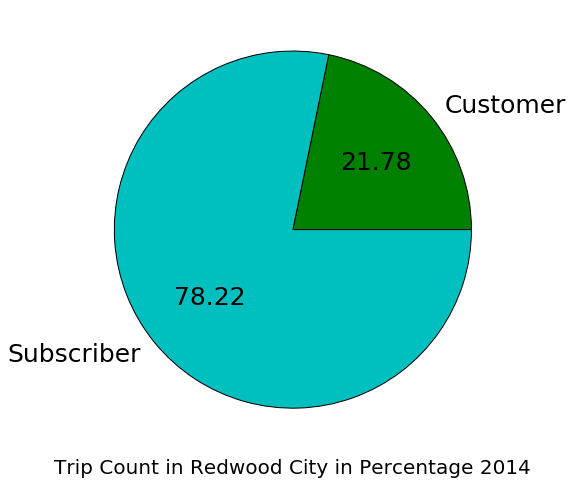

In [277]:
# membership count (same as trip count) counts in Redwood City
rc_trip_data_membership_2014 = rc_trip_data_2014.groupby('membership')
rc_count_2014 = rc_trip_data_membership_2014.count()['trip_duration']
rc_count_2014.plot.pie(autopct='%.2f', fontsize=25, figsize=(8,8),colors=['g', 'c'])
plt.ylabel('')
plt.xlabel('Trip Count in Redwood City in Percentage 2014', fontsize=20)

In [217]:
# RC trip data for each user type
rc_trip_data_membership_2014.describe()

trip_duration
membership                     
Customer   count         303.00
           mean          168.87
           std           361.28
           min             1.42
           25%             9.07
           50%            26.18
           75%           118.93
           max         2,635.80
Subscriber count       1,088.00
           mean            9.95
           std           116.71
           min             1.00
           25%             3.60
           50%             4.40
           75%             5.55
           max         3,831.90

### Mountain View Trip Count and Membership info

In [218]:
mv_trip_data_2014 = pd.DataFrame(mv_trip_data_2014, columns=['user_type', 'trip_time'])
mv_trip_data_2014.columns = ['membership', 'trip_duration']  
mv_trip_data_2014.head()

,membership,trip_duration
38,Subscriber,14.03
55,Subscriber,14.45
78,Subscriber,8.62
125,Customer,14.08
206,Subscriber,23.47


In [220]:
# MV trip data statistics for both user type
mv_trip_data_2014.describe()

,trip_duration
count,"8,115.00"
mean,37.08
std,274.56
min,1.00
25%,4.05
50%,5.05
75%,10.35
max,"9,772.60"


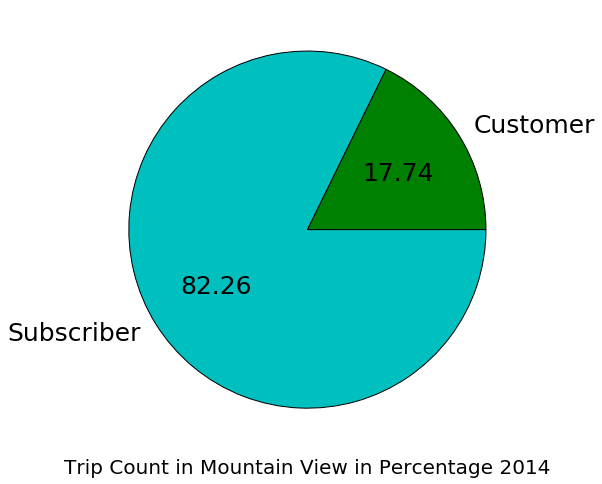

In [265]:
# membership count (same as trip count) counts in Mountain View
mv_trip_data_membership_2014 = mv_trip_data_2014.groupby('membership')
mv_count_2014 = mv_trip_data_membership_2014.count()['trip_duration']
mv_count_2014.plot.pie(autopct='%.2f', fontsize=25, figsize=(8,8),colors=['g', 'c'])
plt.ylabel('')
plt.xlabel('Trip Count in Mountain View in Percentage 2014', fontsize=20)

In [266]:
# MV trip data for each user type
mv_trip_data_membership_2014.describe()

trip_duration
membership                     
Customer   count       1,440.00
           mean          173.08
           std           619.51
           min             1.08
           25%            13.60
           50%            28.06
           75%            98.65
           max         9,772.60
Subscriber count       6,675.00
           mean            7.74
           std            63.61
           min             1.00
           25%             3.93
           50%             4.65
           75%             6.17
           max         4,748.67

### ------------- Year 2015 ------------- 

In [230]:
raw_data_2015.head()

,trip_id,trip_time,start_dt,start_station,start_terminal,end_dt,end_station,end_terminal,bike_num,user_type,ZIP
0,432949,8.97,9/1/14 0:05,South Van Ness at Market,66,9/1/14 0:14,5th at Howard,57,466,Customer,32
1,432948,9.47,9/1/14 0:05,South Van Ness at Market,66,9/1/14 0:15,5th at Howard,57,461,Customer,32
2,432947,9.48,9/1/14 0:05,South Van Ness at Market,66,9/1/14 0:15,5th at Howard,57,318,Customer,32
3,432950,111.87,9/1/14 3:16,Harry Bridges Plaza (Ferry Building),50,9/1/14 5:08,San Francisco Caltrain (Townsend at 4th),70,259,Customer,44100
4,432951,10.32,9/1/14 4:21,Powell Street BART,39,9/1/14 4:32,Townsend at 7th,65,335,Subscriber,94118


In [231]:
# create new dataframes with columns related to only trip time (duration) and user type (subscription)
duration_data_2015 = pd.DataFrame(raw_data_2015, columns=['user_type', 'trip_time'])
duration_data_2015.columns = ['membership', 'trip_duration']  
duration_data_2015.head()

,membership,trip_duration
0,Customer,8.97
1,Customer,9.47
2,Customer,9.48
3,Customer,111.87
4,Subscriber,10.32


## Total Count and member in total

In [232]:
# duration description in total --> notice count increases 
duration_data_2015.describe()

,trip_duration
count,"354,152.00"
mean,17.43
std,500.28
min,1.00
25%,5.70
50%,8.52
75%,12.32
max,"287,840.00"


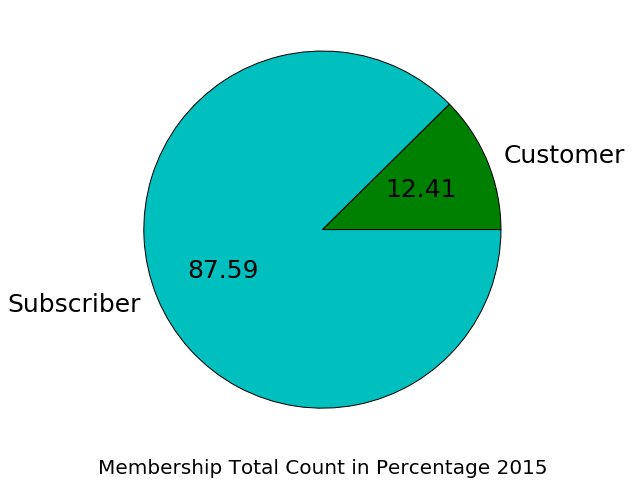

In [234]:
# membership count (same as trip count) counts in total
membership_2015 = duration_data_2015.groupby('membership')
count_2015 = membership_2015.count()['trip_duration']
count_2015.plot.pie(autopct='%.2f', fontsize=25, figsize=(8,8),colors=['g', 'c'])
plt.ylabel('')
plt.xlabel('Membership Total Count in Percentage 2015', fontsize=20)

In [267]:
# statistics table for total customer and subscribers in 2015
membership_2015.describe()

trip_duration
membership                     
Customer   count      43,935.00
           mean           70.24
           std         1,408.30
           min             1.00
           25%            11.12
           50%            18.85
           75%            40.38
           max       287,840.00
Subscriber count     310,217.00
           mean            9.95
           std            66.28
           min             1.00
           25%             5.42
           50%             7.98
           75%            11.15
           max        30,876.50

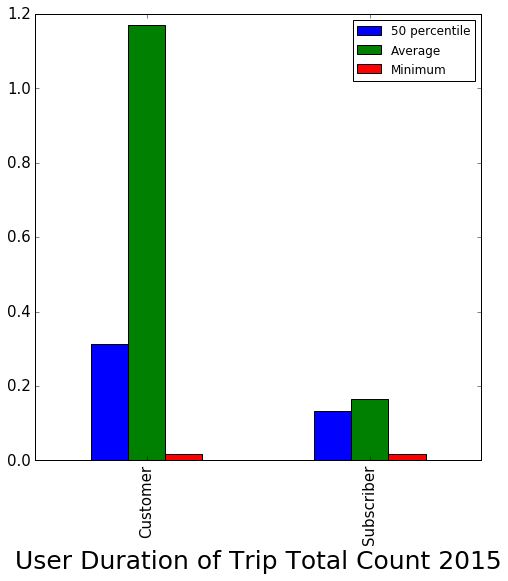

In [236]:
# make a new table with min, max, mean for both membership
mean_2015 = membership_2015.mean()['trip_duration'] / 60  # unit in hour
min_2015 = membership_2015.min()['trip_duration'] / 60 # unit in hour  
mid_2015 = membership_2015.quantile(0.5)['trip_duration'] / 60  # unit in hour
#max_2015 = membership_2015.max()['trip_duration'] / 60 # unit in hour ---> too big

member_time_2015 = pd.DataFrame({'Average': mean_2015, '50 percentile': mid_2015, 'Minimum': min_2015})
member_time_2015.plot.bar(figsize=(8,8),fontsize=15)
plt.xlabel('User Duration of Trip Total Count 2015', fontsize=25)

## Trip Count and membership info per city (SF, RC, PA, SJ, MV)

In [269]:
# filter raw trip data 2015 according to station ID
sf_trip_data_2015 = raw_data_2015[raw_data_2015['start_terminal'].isin(palo_alto_station_id)]
sj_trip_data_2015 = raw_data_2015[raw_data_2015['start_terminal'].isin(san_jose_station_id)]
rc_trip_data_2015 = raw_data_2015[raw_data_2015['start_terminal'].isin(redwood_city_station_id)]
pa_trip_data_2015 = raw_data_2015[raw_data_2015['start_terminal'].isin(palo_alto_station_id)]
mv_trip_data_2015 = raw_data_2015[raw_data_2015['start_terminal'].isin(mountain_view_station_id)]

### San Francisco Trip Count and Membership info

In [238]:
sf_trip_data_2015 = pd.DataFrame(sf_trip_data_2015, columns=['user_type', 'trip_time'])
sf_trip_data_2015.columns = ['membership', 'trip_duration']  
sf_trip_data_2015.head()

,membership,trip_duration
78,Customer,227.25
403,Subscriber,3.63
473,Customer,170.87
916,Subscriber,2.87
940,Customer,9.30


In [239]:
# SF trip data statistics for both user type
sf_trip_data_2015.describe()

,trip_duration
count,"3,073.00"
mean,70.50
std,492.46
min,1.10
25%,4.80
50%,14.38
75%,33.63
max,"18,892.33"


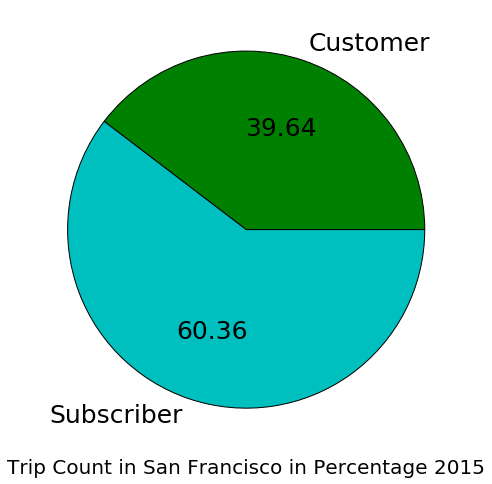

In [240]:
# membership count (same as trip count) counts in San Francisco
sf_trip_data_membership_2015 = sf_trip_data_2015.groupby('membership')
sf_count_2015 = sf_trip_data_membership_2015.count()['trip_duration']
sf_count_2015.plot.pie(autopct='%.2f', fontsize=25, figsize=(8,8),colors=['g', 'c'])
plt.ylabel('')
plt.xlabel('Trip Count in San Francisco in Percentage 2015', fontsize=20)

In [241]:
# SF trip data for each user type
sf_trip_data_membership_2015.describe()

trip_duration
membership                     
Customer   count       1,218.00
           mean          147.18
           std           756.34
           min             1.37
           25%            21.12
           50%            44.82
           75%            91.42
           max        18,892.33
Subscriber count       1,855.00
           mean           20.15
           std           141.21
           min             1.10
           25%             3.97
           50%             9.57
           75%            14.47
           max         3,540.47

### San Jose Trip Count and Membership info

In [243]:
sj_trip_data_2015 = pd.DataFrame(sj_trip_data_2015, columns=['user_type', 'trip_time'])
sj_trip_data_2015.columns = ['membership', 'trip_duration']  
sj_trip_data_2015.head()

,membership,trip_duration
8,Customer,94.45
29,Subscriber,8.63
66,Subscriber,9.22
97,Customer,134.13
113,Subscriber,11.62


In [244]:
# SJ trip data statistics for both user type
sj_trip_data_2015.describe()

,trip_duration
count,"17,956.00"
mean,23.35
std,225.87
min,1.03
25%,5.20
50%,7.77
75%,11.05
max,"10,932.32"


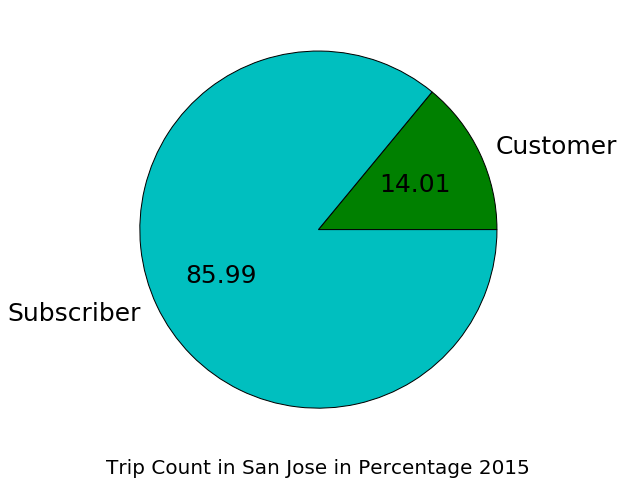

In [246]:
# membership count (same as trip count) counts in San Jose
sj_trip_data_membership_2015 = sj_trip_data_2015.groupby('membership')
sj_count_2015 = sj_trip_data_membership_2015.count()['trip_duration']
sj_count_2015.plot.pie(autopct='%.2f', fontsize=25, figsize=(8,8),colors=['g', 'c'])
plt.ylabel('')
plt.xlabel('Trip Count in San Jose in Percentage 2015', fontsize=20)

In [247]:
# SJ trip data for each user type
sj_trip_data_membership_2015.describe()

trip_duration
membership                     
Customer   count       2,516.00
           mean          100.78
           std           560.92
           min             1.03
           25%            10.48
           50%            19.88
           75%            45.18
           max        10,932.32
Subscriber count      15,440.00
           mean           10.73
           std            83.31
           min             1.03
           25%             4.88
           50%             7.28
           75%             9.83
           max         4,922.95

### Palo Alto Trip Count and Membership info

In [248]:
pa_trip_data_2015 = pd.DataFrame(pa_trip_data_2015, columns=['user_type', 'trip_time'])
pa_trip_data_2015.columns = ['membership', 'trip_duration']  
pa_trip_data_2015.head()

,membership,trip_duration
78,Customer,227.25
403,Subscriber,3.63
473,Customer,170.87
916,Subscriber,2.87
940,Customer,9.30


In [249]:
# PA trip data statistics for both user type
pa_trip_data_2015.describe()

,trip_duration
count,"3,073.00"
mean,70.50
std,492.46
min,1.10
25%,4.80
50%,14.38
75%,33.63
max,"18,892.33"


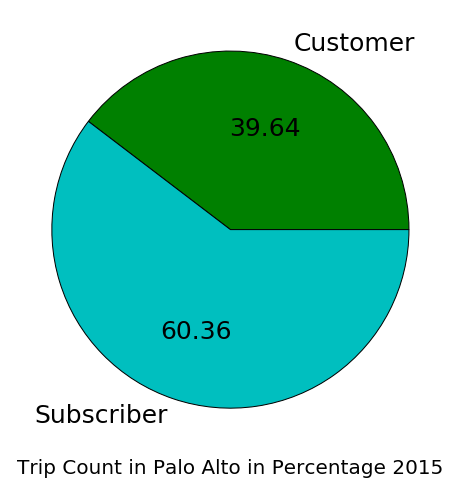

In [250]:
# membership count (same as trip count) counts in Palo Alto
pa_trip_data_membership_2015 = pa_trip_data_2015.groupby('membership')
pa_count_2015 = pa_trip_data_membership_2015.count()['trip_duration']
pa_count_2015.plot.pie(autopct='%.2f', fontsize=25, figsize=(8,8),colors=['g', 'c'])
plt.ylabel('')
plt.xlabel('Trip Count in Palo Alto in Percentage 2015', fontsize=20)

In [251]:
# PA trip data for each user type
pa_trip_data_membership_2015.describe()

trip_duration
membership                     
Customer   count       1,218.00
           mean          147.18
           std           756.34
           min             1.37
           25%            21.12
           50%            44.82
           75%            91.42
           max        18,892.33
Subscriber count       1,855.00
           mean           20.15
           std           141.21
           min             1.10
           25%             3.97
           50%             9.57
           75%            14.47
           max         3,540.47

### Redwood CIty Trip Count and Membership info

In [274]:
rc_trip_data_2015 = pd.DataFrame(rc_trip_data_2015, columns=['user_type', 'trip_time'])
rc_trip_data_2015.columns = ['membership', 'trip_duration']  
rc_trip_data_2015.head()

,membership,trip_duration
752,Subscriber,5.10
859,Subscriber,5.22
1936,Customer,6.53
2115,Subscriber,4.00
2190,Subscriber,5.62


In [275]:
# RC trip data statistics for both user type
rc_trip_data_2015.describe()

,trip_duration
count,"2,019.00"
mean,38.13
std,350.76
min,1.13
25%,4.56
50%,10.35
75%,14.39
max,"12,007.57"


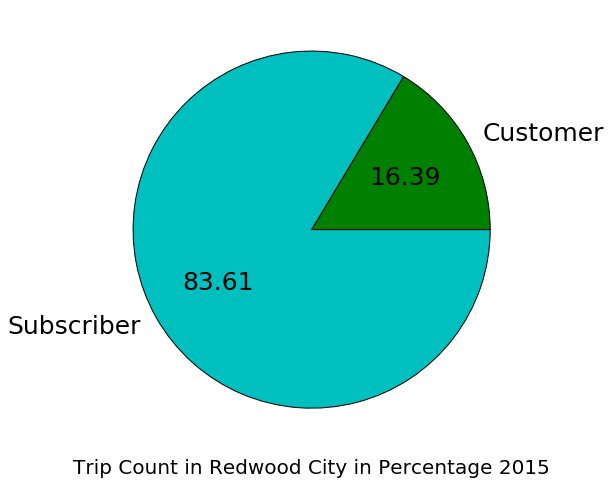

In [276]:
# membership count (same as trip count) counts in Redwood City
rc_trip_data_membership_2015 = rc_trip_data_2015.groupby('membership')
rc_count_2015 = rc_trip_data_membership_2015.count()['trip_duration']
rc_count_2015.plot.pie(autopct='%.2f', fontsize=25, figsize=(8,8),colors=['g', 'c'])
plt.ylabel('')
plt.xlabel('Trip Count in Redwood City in Percentage 2015', fontsize=20)

In [278]:
# RC trip data for each user type
rc_trip_data_membership_2015.describe()

trip_duration
membership                     
Customer   count         331.00
           mean          174.86
           std           851.46
           min             1.25
           25%            12.89
           50%            24.40
           75%            70.12
           max        12,007.57
Subscriber count       1,688.00
           mean           11.31
           std            31.06
           min             1.13
           25%             4.30
           50%             7.53
           75%            13.17
           max         1,052.30

### Mountain View Trip Count and Membership info

In [279]:
mv_trip_data_2015 = pd.DataFrame(mv_trip_data_2015, columns=['user_type', 'trip_time'])
mv_trip_data_2015.columns = ['membership', 'trip_duration']  
mv_trip_data_2015.head()

,membership,trip_duration
10,Customer,289.93
11,Customer,288.28
49,Subscriber,5.55
188,Customer,261.32
196,Customer,159.02


In [280]:
# MV trip data statistics for both user type
mv_trip_data_2015.describe()

,trip_duration
count,"9,999.00"
mean,23.83
std,338.98
min,1.02
25%,3.97
50%,4.90
75%,7.62
max,"30,876.50"


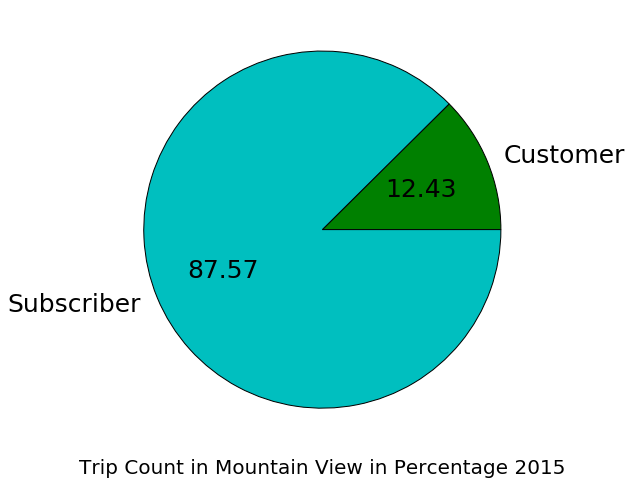

In [281]:
# membership count (same as trip count) counts in Mountain View
mv_trip_data_membership_2015 = mv_trip_data_2015.groupby('membership')
mv_count_2015 = mv_trip_data_membership_2015.count()['trip_duration']
mv_count_2015.plot.pie(autopct='%.2f', fontsize=25, figsize=(8,8),colors=['g', 'c'])
plt.ylabel('')
plt.xlabel('Trip Count in Mountain View in Percentage 2015', fontsize=20)

In [282]:
# RC trip data for each user type
mv_trip_data_membership_2015.describe()

trip_duration
membership                     
Customer   count       1,243.00
           mean          114.26
           std           380.09
           min             1.02
           25%            13.02
           50%            24.78
           75%            84.70
           max         9,211.62
Subscriber count       8,756.00
           mean           11.00
           std           330.76
           min             1.02
           25%             3.88
           50%             4.65
           75%             6.02
           max        30,876.50

In [ ]:
# number of trips for each membership compared with weather (part 3)
# count trip id
# weather for each month and each season